In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score, precision_recall_curve

In [2]:
plt.style.use('seaborn-darkgrid')
sns.set(style="darkgrid")

<ipython-input-2-8aa3a9a5b1cd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [29]:
models = ["ALBERT", "BERT", "DISTILBERT", "ELECTRA", "ROBERTA", "Випадковий ліс", "Логістична регресія", "Логістична регресія з шаром SGD", "Логістична регресія з шаром LBFGS"]
cm_movies = [
    np.array([[11737, 763], [1132, 11368]]),
    np.array([[11789, 711], [848, 11652]]),
    np.array([[11661, 839], [968, 11532]]),
    np.array([[11859, 641], [475, 12025]]),
    np.array([[11845, 655], [663, 11837]]),
    np.array([[11153, 1347], [1257, 11243]]),
    np.array([[11009, 1491], [1446, 11054]]),
    np.array([[10896, 1604], [1455, 11045]]),
    np.array([[11153, 1347], [1257, 11243]])
]

cm_news = [
    np.array([[1911, 171], [71, 1887]]),
    np.array([[2044, 38], [84, 1874]]),
    np.array([[2020, 38], [63, 1914]]),
    np.array([[2002, 32], [155, 1842]]),
    np.array([[2030, 28], [107, 1870]]),
    np.array([[2045, 54], [4, 1927]]),
    np.array([[1856, 243], [15, 1916]]),
    np.array([[1810, 289], [15, 1916]]),
    np.array([[1869, 230], [12, 1919]])
]

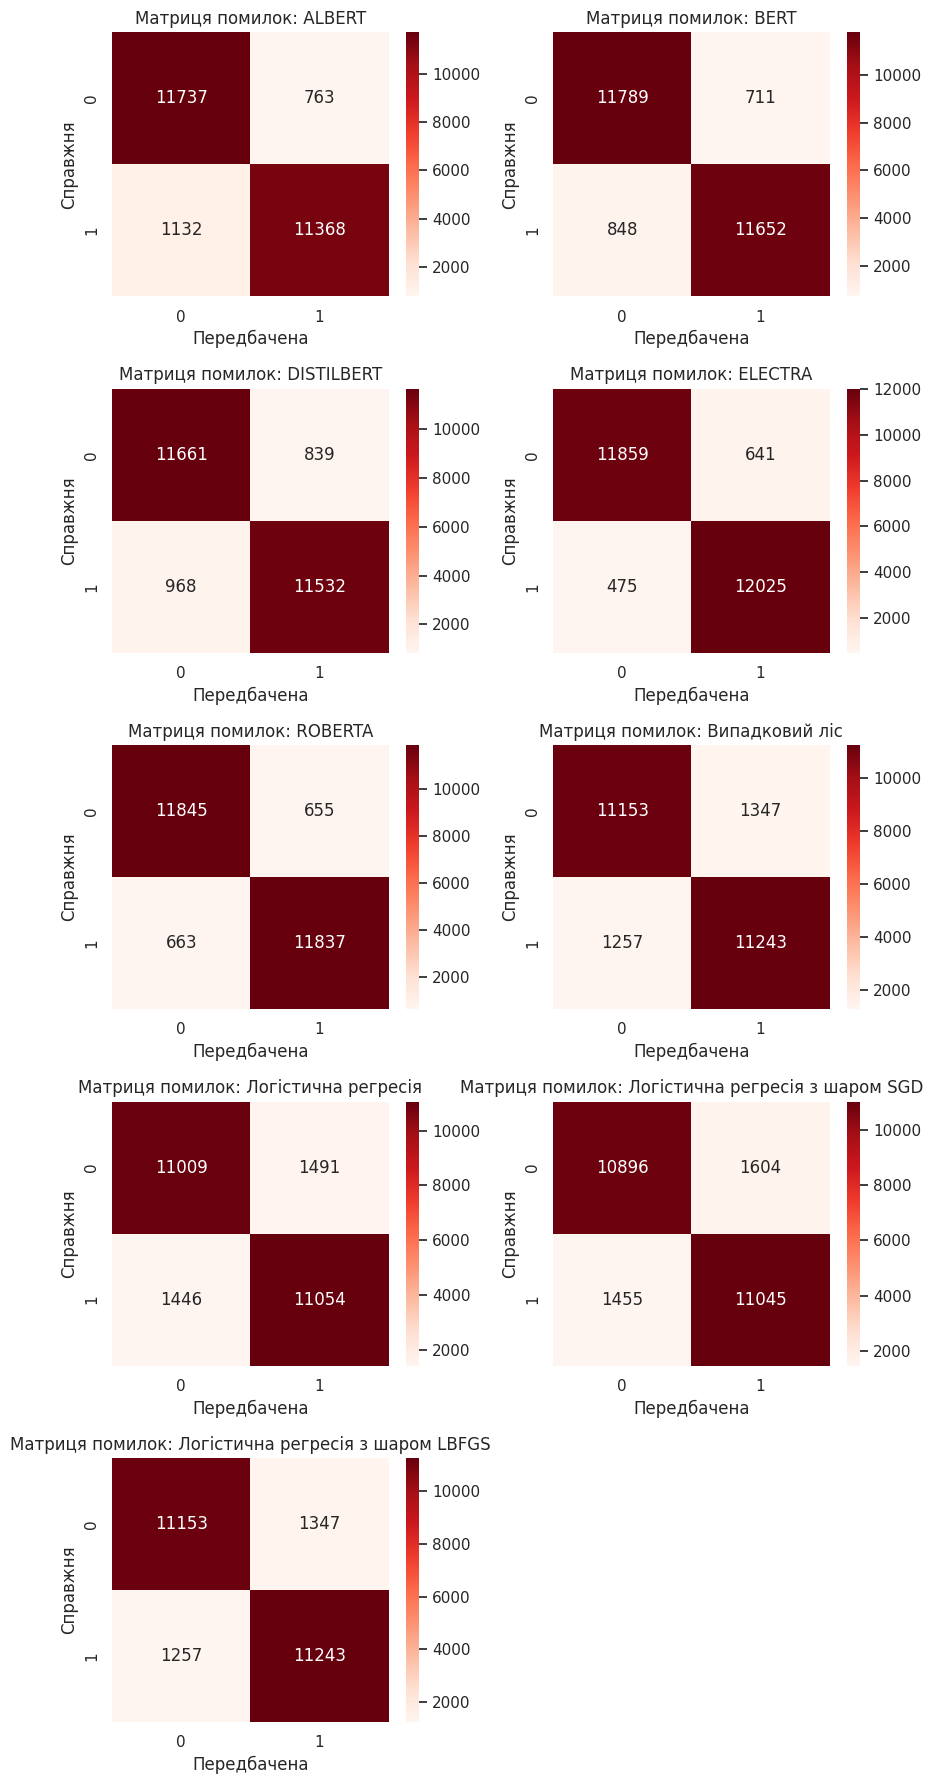

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(9, 18))
axes = axes.flatten()
for i, (model, cm) in enumerate(zip(models, cm_movies)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Матриця помилок: {model}')
    axes[i].set_xlabel('Передбачена')
    axes[i].set_ylabel('Справжня')

if len(models) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

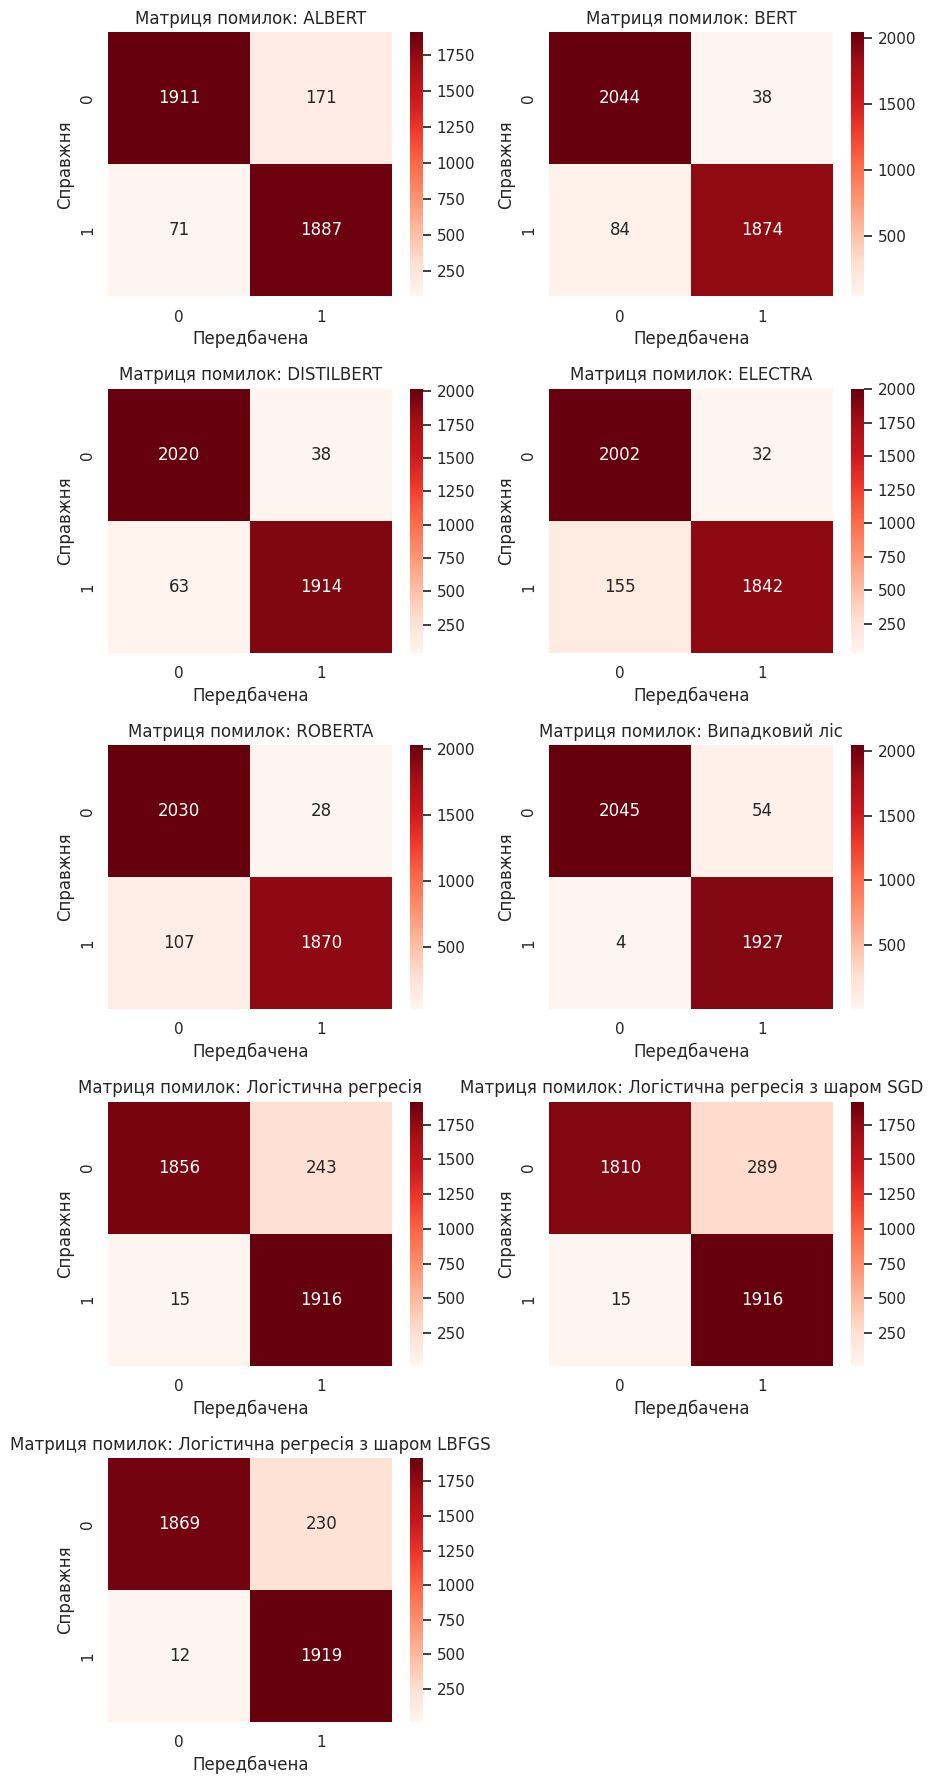

In [31]:
fig, axes = plt.subplots(5, 2, figsize=(9, 18))
axes = axes.flatten()
for i, (model, cm) in enumerate(zip(models, cm_news)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Матриця помилок: {model}')
    axes[i].set_xlabel('Передбачена')
    axes[i].set_ylabel('Справжня')

if len(models) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

<ipython-input-34-2c1f33847908>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


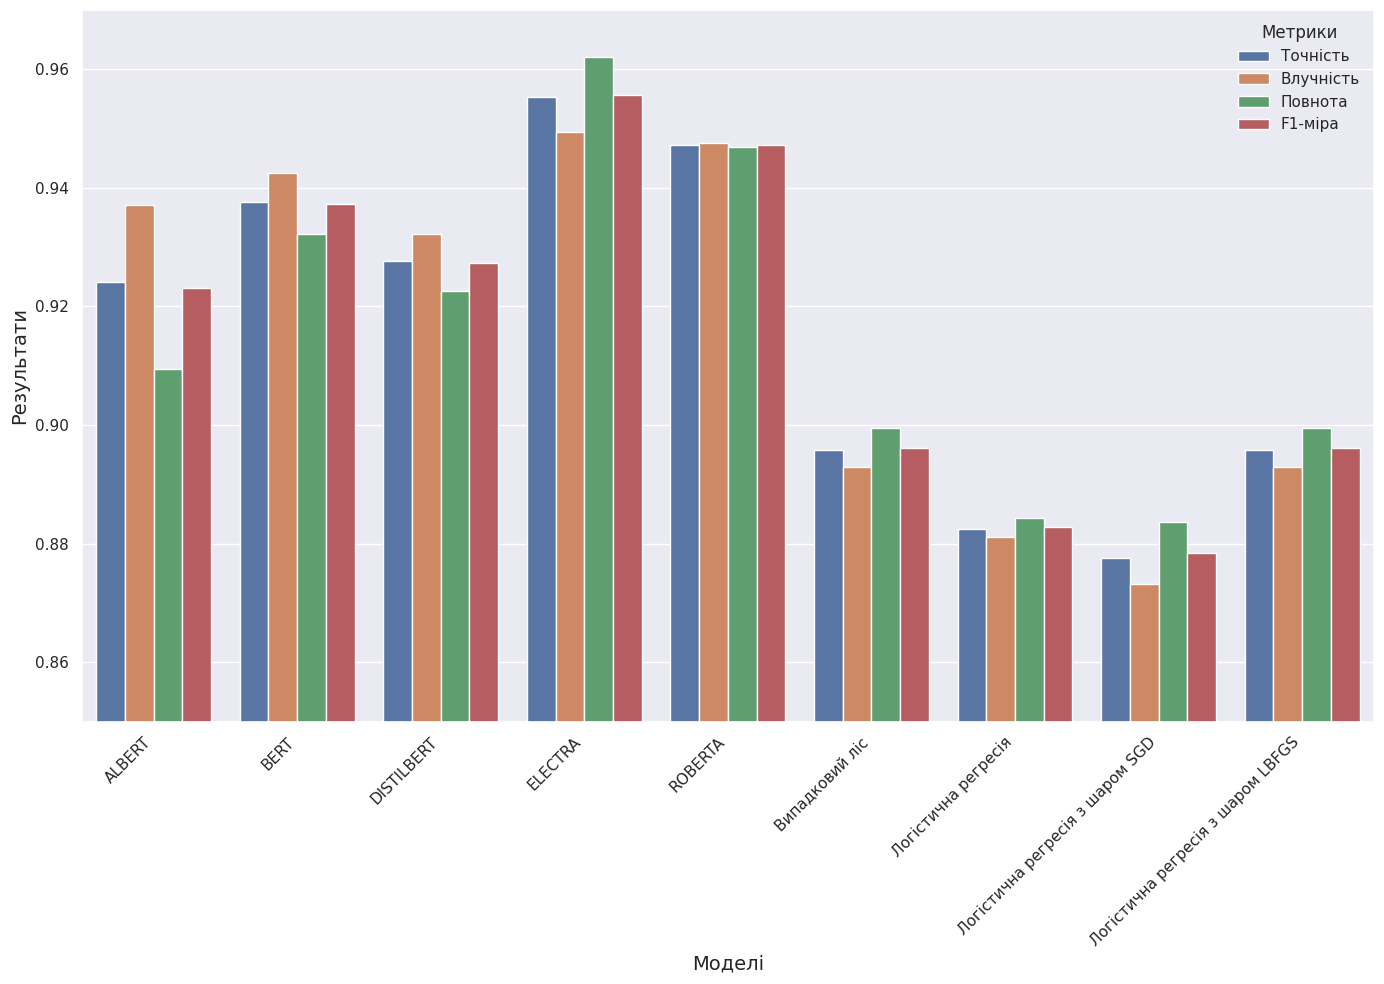

In [34]:
accuracy = []
precision = []
recall = []
f1 = []

for matrix in cm_movies:
    tn, fp, fn, tp = matrix.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1_score = (2 * prec * rec) / (prec + rec)
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1.append(f1_score)

df = pd.DataFrame({
    "Model": models*4,
    "Метрики": ["Точність"]*9 + ["Влучність"]*9 + ["Повнота"]*9 + ["F1-міра"]*9,
    "Score": accuracy + precision + recall + f1
})

plt.figure(figsize=(14, 10))
ax = sns.barplot(y='Score', x='Model', hue='Метрики', data=df, dodge=True)

plt.xlabel('Моделі', fontsize=14)
plt.ylabel('Результати', fontsize=14)
plt.ylim(0.85, 0.97)

ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-35-57bf1a653630>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


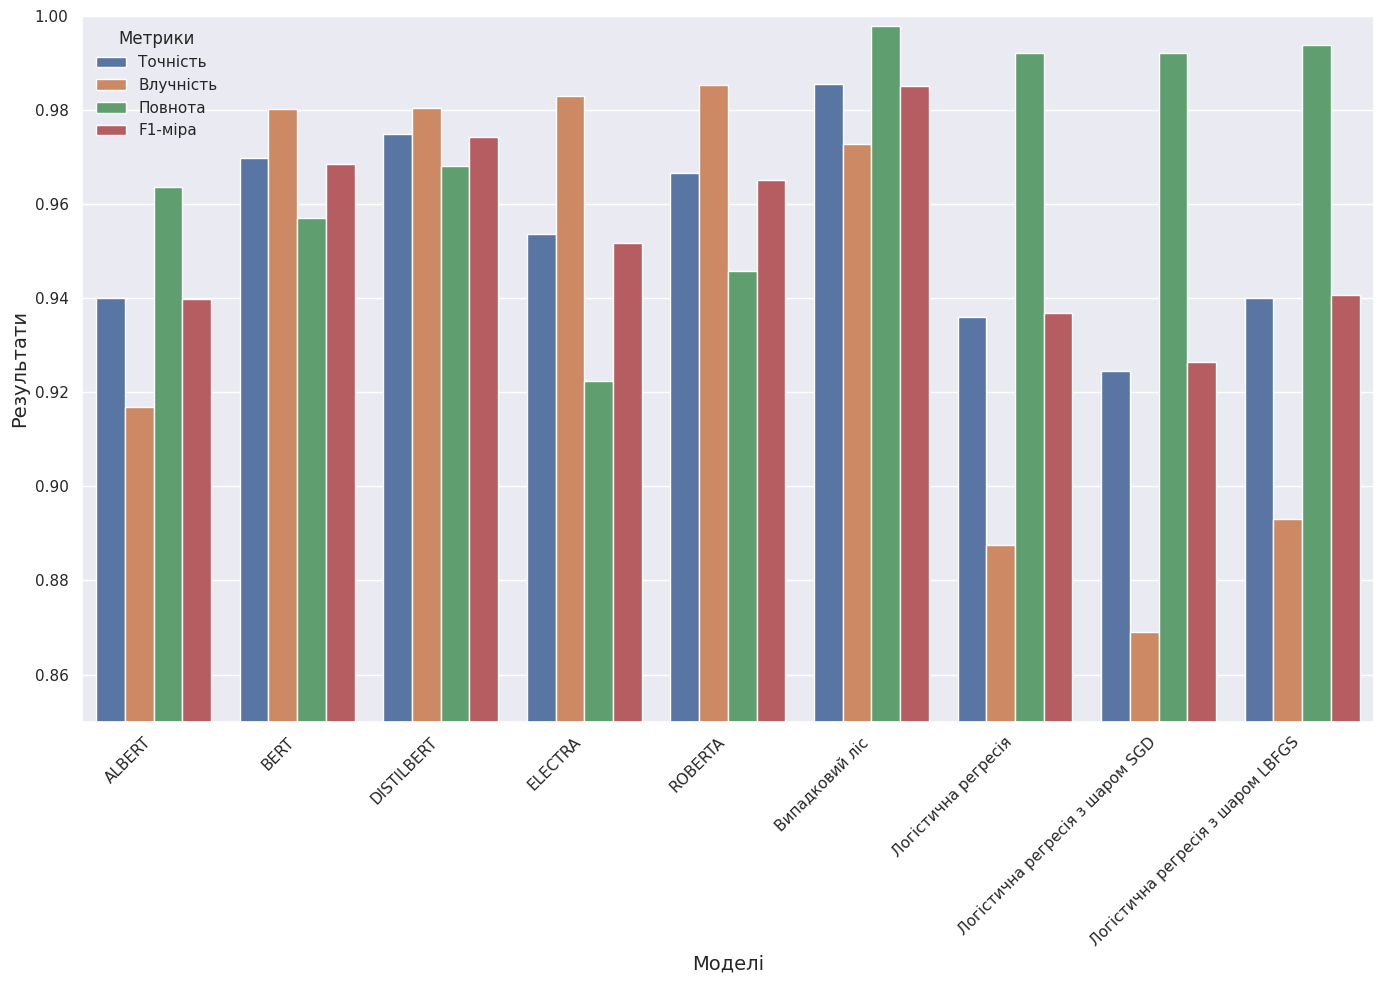

In [35]:
accuracy = []
precision = []
recall = []
f1 = []

for matrix in cm_news:
    tn, fp, fn, tp = matrix.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f1_score = (2 * prec * rec) / (prec + rec)
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1.append(f1_score)

df = pd.DataFrame({
    "Model": models*4,
    "Метрики": ["Точність"]*9 + ["Влучність"]*9 + ["Повнота"]*9 + ["F1-міра"]*9,
    "Score": accuracy + precision + recall + f1
})

plt.figure(figsize=(14, 10))
ax = sns.barplot(y='Score', x='Model', hue='Метрики', data=df, dodge=True)

plt.xlabel('Моделі', fontsize=14)
plt.ylabel('Результати', fontsize=14)
plt.ylim(0.85, 1)

ax.set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

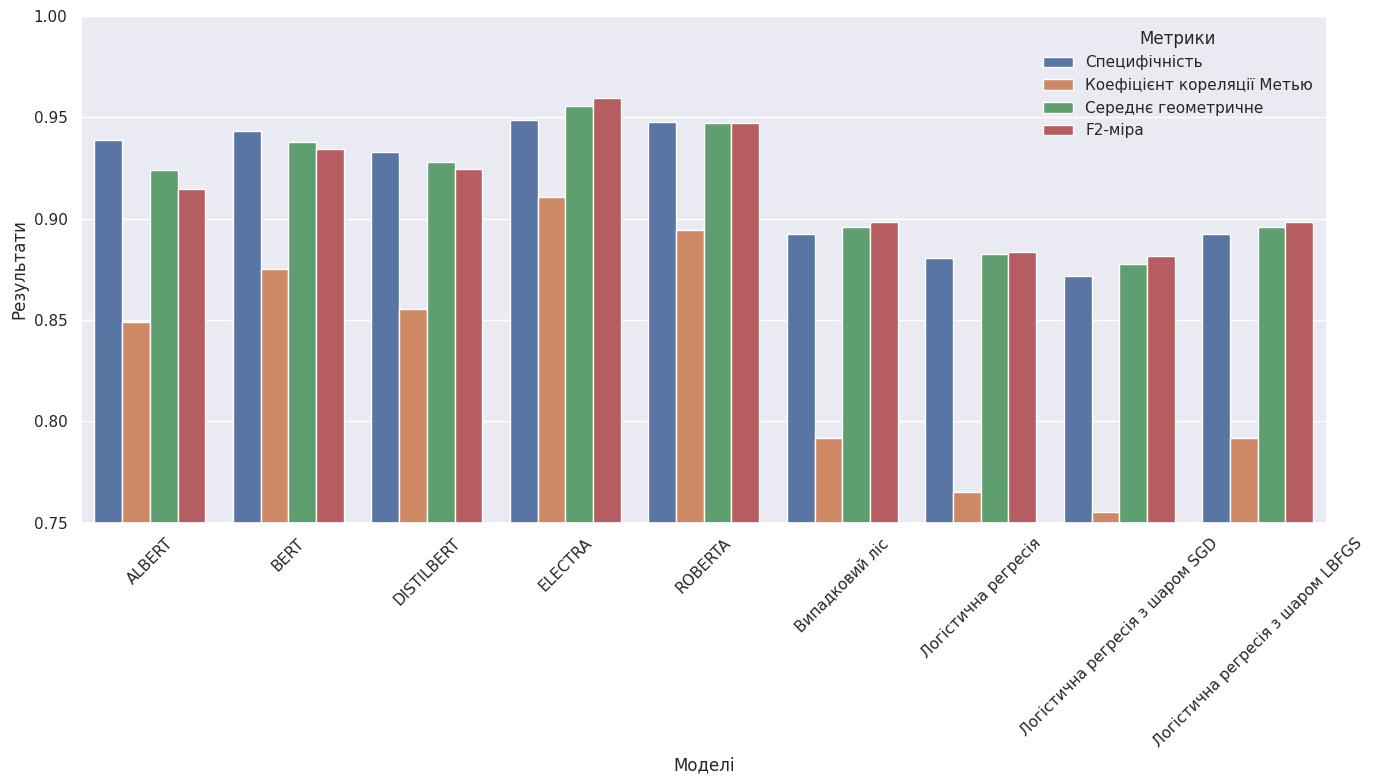

In [36]:
specificity = []
mcc = []
gmean = []
f2 = []

for matrix in cm_movies:
    tn, fp, fn, tp = matrix.ravel()
    specificity.append(tn / (tn + fp))
    mcc.append((tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    gmean.append(np.sqrt((tp / (tp + fn)) * (tn / (tn + fp))))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f2.append((5 * precision * recall) / (4 * precision + recall))

metrics_df = pd.DataFrame({
    "Моделі": models,
    "Специфічність": specificity,
    "Коефіцієнт кореляції Метью": mcc,
    "Середнє геометричне": gmean,
    "F2-міра": f2
})

plt.figure(figsize=(14, 8))

sns.barplot(data=metrics_df.melt(id_vars='Моделі'), x='Моделі', y='value', hue='variable')
plt.xlabel('Моделі')
plt.ylabel('Результати')
plt.xticks(rotation=45)
plt.legend(title='Метрики')
plt.ylim(0.75, 1)

plt.tight_layout()
plt.show()

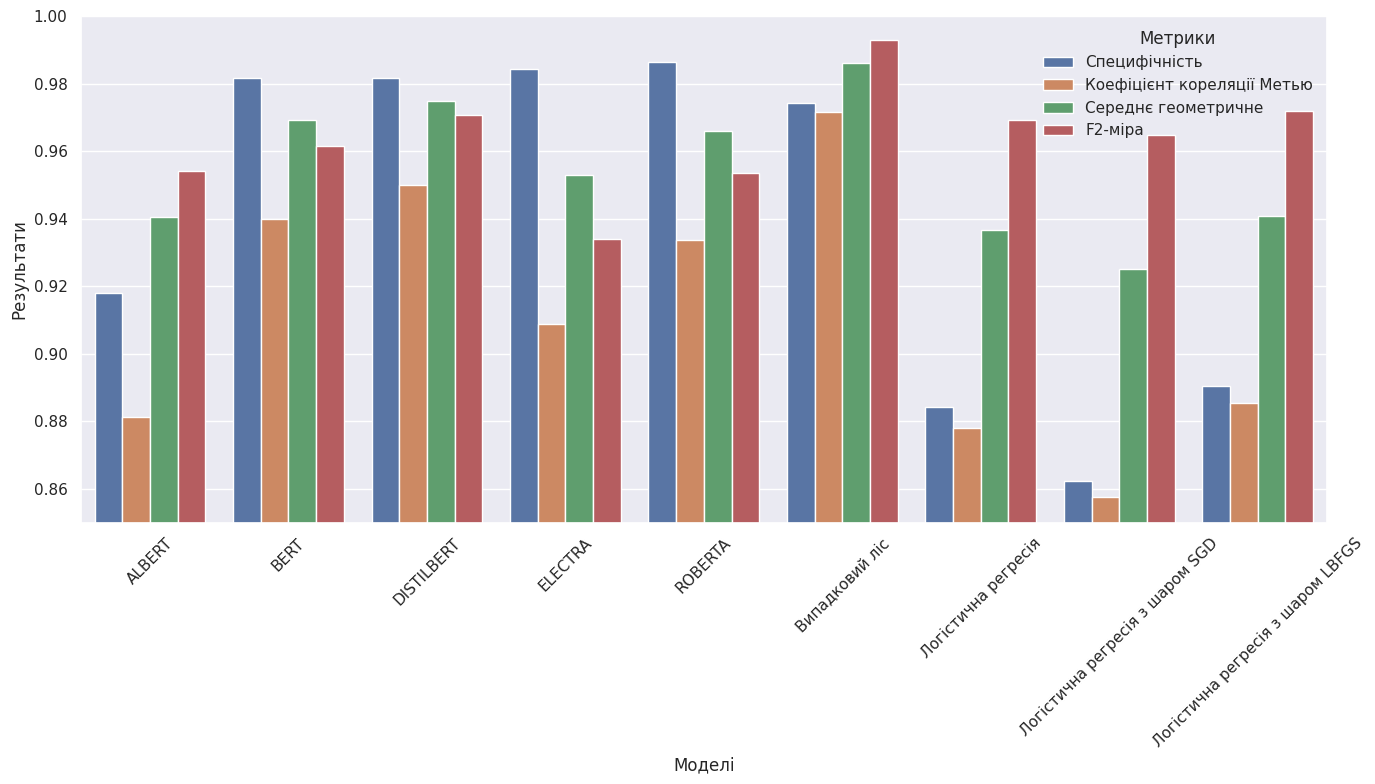

In [37]:
specificity = []
mcc = []
gmean = []
f2 = []

for matrix in cm_news:
    tn, fp, fn, tp = matrix.ravel()
    specificity.append(tn / (tn + fp))
    mcc.append((tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))
    gmean.append(np.sqrt((tp / (tp + fn)) * (tn / (tn + fp))))
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f2.append((5 * precision * recall) / (4 * precision + recall))

metrics_df = pd.DataFrame({
    "Моделі": models,
    "Специфічність": specificity,
    "Коефіцієнт кореляції Метью": mcc,
    "Середнє геометричне": gmean,
    "F2-міра": f2
})

plt.figure(figsize=(14, 8))

sns.barplot(data=metrics_df.melt(id_vars='Моделі'), x='Моделі', y='value', hue='variable')
plt.xlabel('Моделі')
plt.ylabel('Результати')
plt.xticks(rotation=45)
plt.legend(title='Метрики')
plt.ylim(0.85, 1)

plt.tight_layout()
plt.show()

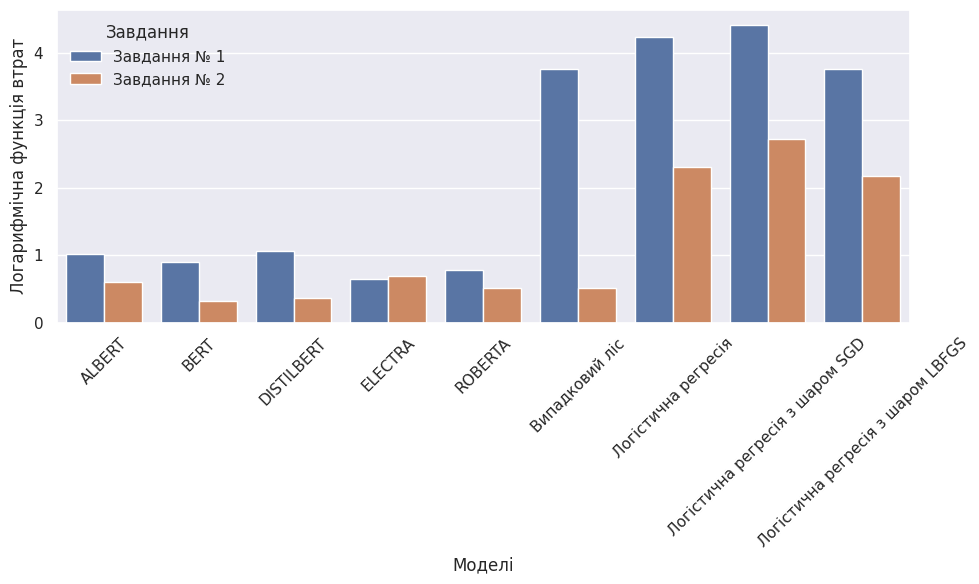

In [38]:
log_loss_1 = [1.020363, 0.901527, 1.0541, 0.650756, 0.78367, 3.7543, 4.2344, 4.41030, 3.7543]
log_loss_2 = [0.596777, 0.324198, 0.368232, 0.696832, 0.518404, 0.51874, 2.307509, 2.7189, 2.1644]

metrics_df = pd.DataFrame({
    "Модель": models,
    "Завдання № 1": log_loss_1,
    "Завдання № 2": log_loss_2
})

plt.figure(figsize=(10, 6))

sns.barplot(data=metrics_df.melt(id_vars='Модель'), x='Модель', y='value', hue='variable')
plt.xlabel('Моделі')
plt.ylabel('Логарифмічна функція втрат')
plt.legend(title='Завдання')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

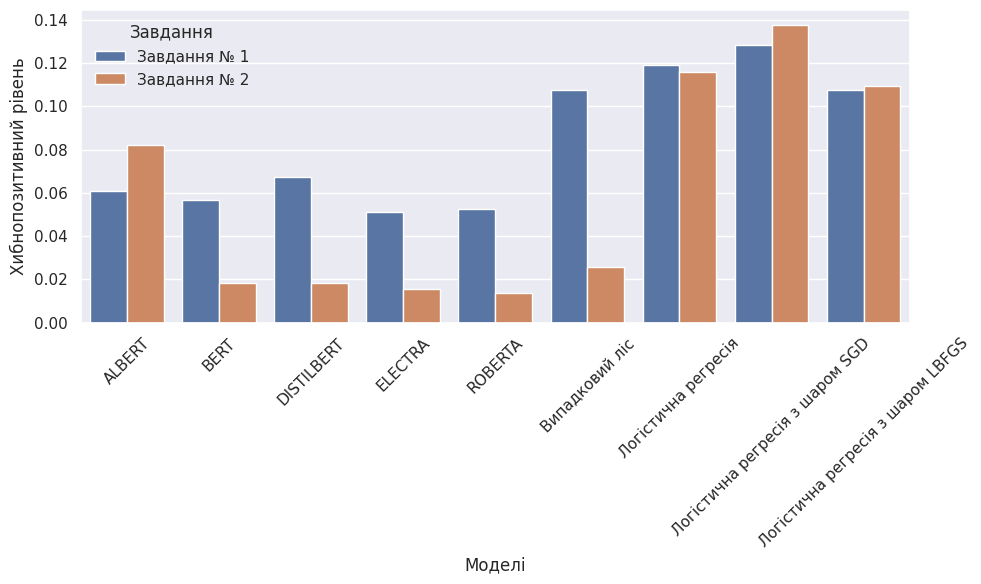

In [39]:
fpr_1 = [0.06104, 0.05688, 0.06711, 0.051279, 0.0524, 0.107759, 0.11928, 0.12832, 0.107759]
fpr_2 = [0.082133, 0.018252, 0.018465, 0.015733, 0.013605, 0.02572, 0.115769, 0.13768, 0.109575]

metrics_df = pd.DataFrame({
    "Модель": models,
    "Завдання № 1": fpr_1,
    "Завдання № 2": fpr_2
})

plt.figure(figsize=(10, 6))

sns.barplot(data=metrics_df.melt(id_vars='Модель'), x='Модель', y='value', hue='variable')
plt.xlabel('Моделі')
plt.ylabel('Хибнопозитивний рівень')
plt.legend(title='Завдання')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

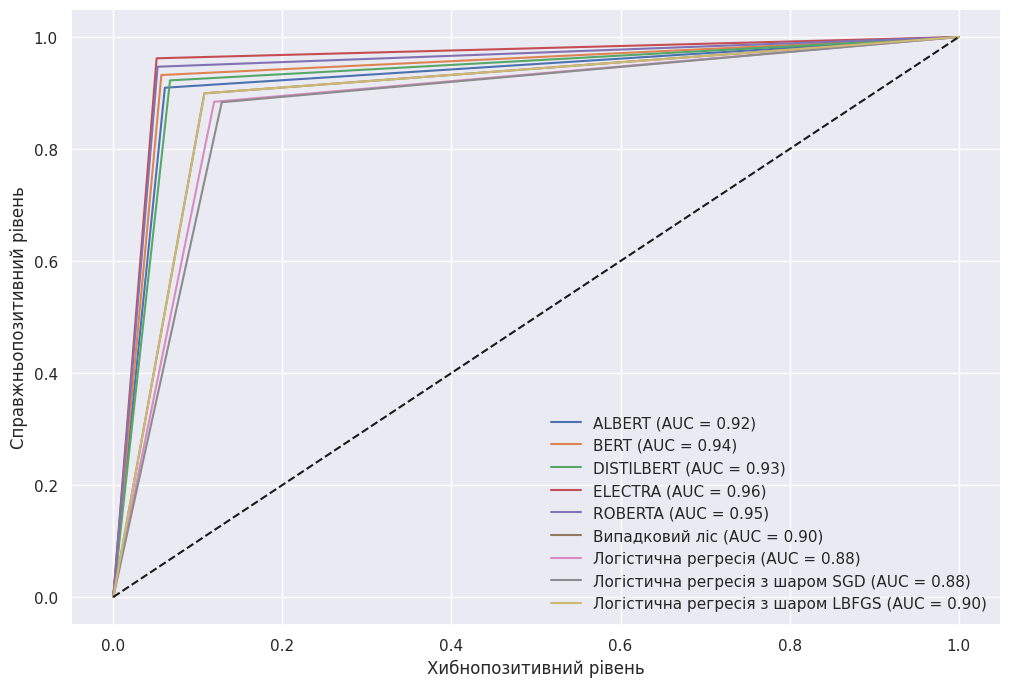

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

for model, cm in zip(models, cm_movies):
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    y_true = [0] * (tn + fp) + [1] * (fn + tp)
    y_scores = [0] * tn + [1] * fp + [0] * fn + [1] * tp
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    ax.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('Хибнопозитивний рівень')
ax.set_ylabel('Справжньопозитивний рівень')
ax.legend()
plt.show()

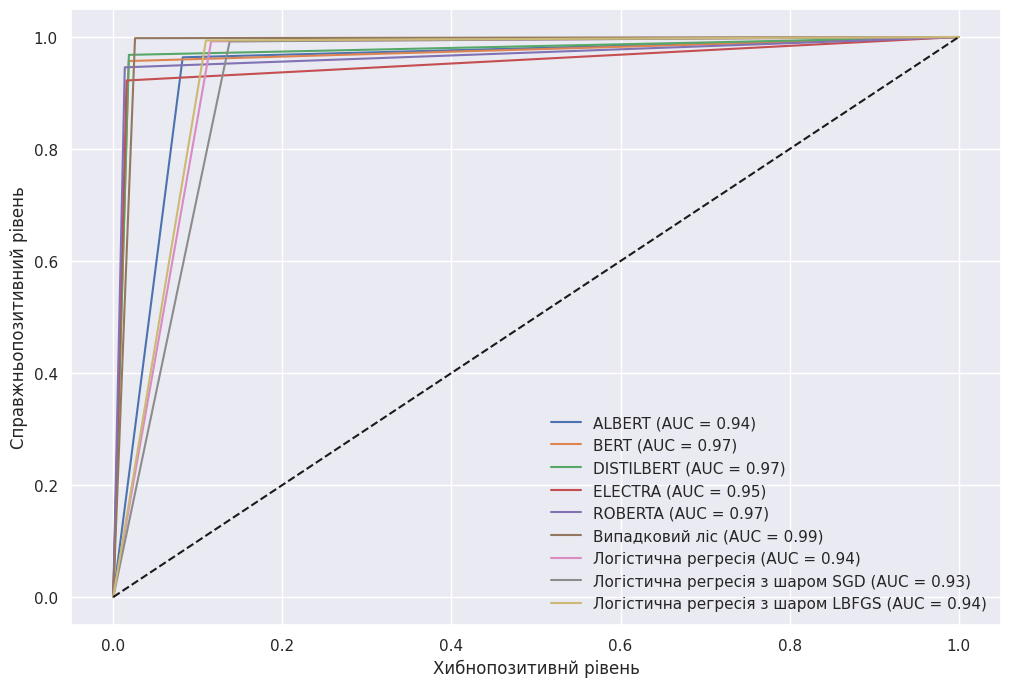

In [41]:
plt.figure(figsize=(12, 8))

for model, cm in zip(models, cm_news):
    tn, fp, fn, tp = cm.ravel()
    y_true = [0] * (tn + fp) + [1] * (fn + tp)
    y_scores = [0] * tn + [1] * fp + [0] * fn + [1] * tp
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Хибнопозитивнй рівень')
plt.ylabel('Справжньопозитивний рівень')
plt.legend()
plt.grid(True)
plt.show()

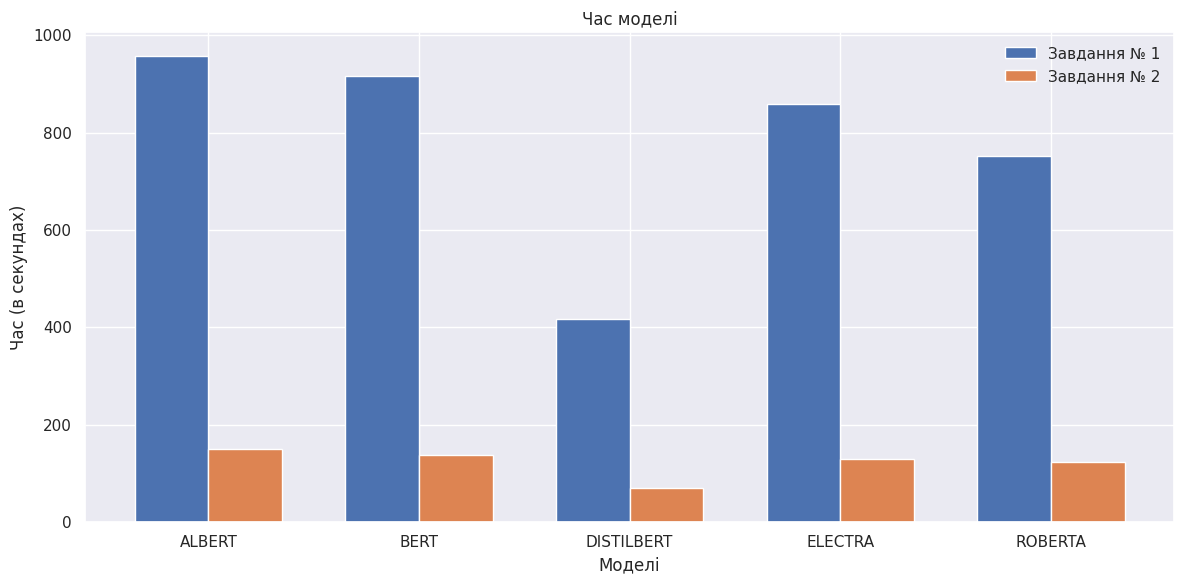

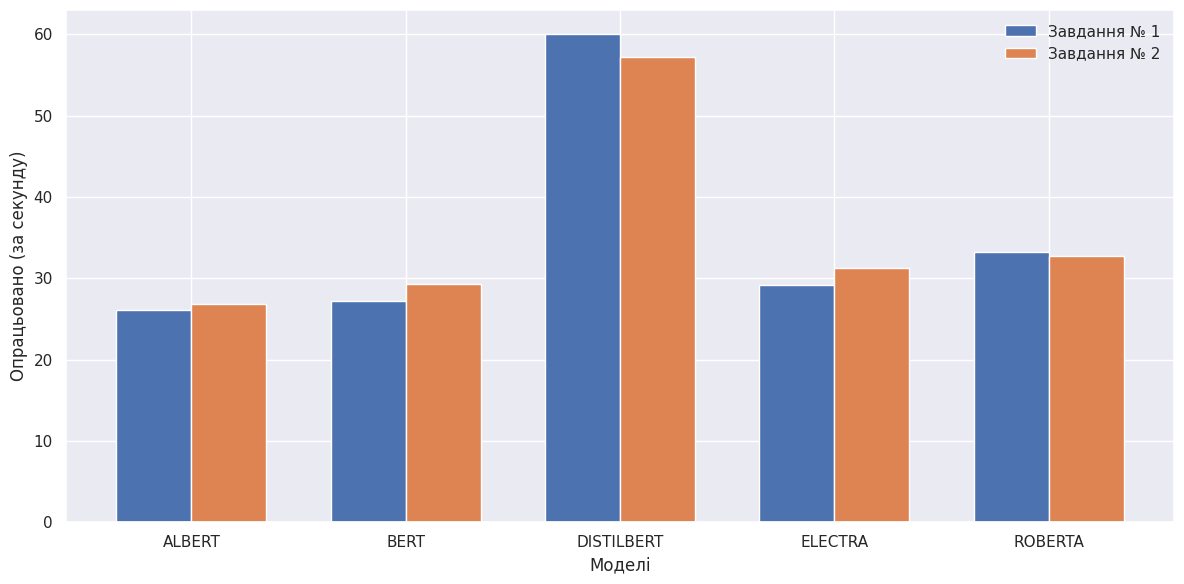

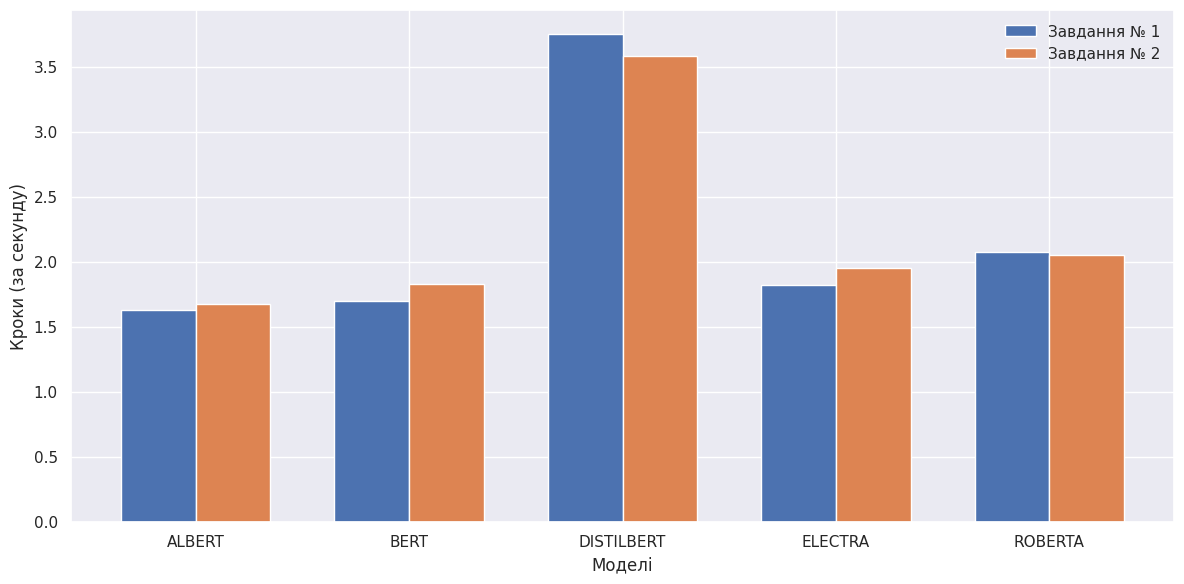

In [42]:
runtime_task1 = [957.8034, 917.063, 416.6629, 858.3099, 751.1142]
samples_per_sec_task1 = [26.101, 27.261, 60.001, 29.127, 33.284]
steps_per_sec_task1 = [1.632, 1.704, 3.751, 1.821, 2.081]

runtime_task2 = [150.8331, 138.0421, 70.5663, 128.9251, 123.23]
samples_per_sec_task2 = [26.785, 29.266, 57.18, 31.266, 32.741]
steps_per_sec_task2 = [1.677, 1.833, 3.585, 1.955, 2.053]

models = ["ALBERT", "BERT", "DISTILBERT", "ELECTRA", "ROBERTA"]

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))
plt.bar(index, runtime_task1, bar_width, label='Завдання № 1')
plt.bar(index + bar_width, runtime_task2, bar_width, label='Завдання № 2')
plt.xlabel('Моделі')
plt.ylabel('Час (в секундах)')
plt.title('Час моделі')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(index, samples_per_sec_task1, bar_width, label='Завдання № 1')
plt.bar(index + bar_width, samples_per_sec_task2, bar_width, label='Завдання № 2')
plt.xlabel('Моделі')
plt.ylabel('Опрацьовано (за секунду)')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(index, steps_per_sec_task1, bar_width, label='Завдання № 1')
plt.bar(index + bar_width, steps_per_sec_task2, bar_width, label='Завдання № 2')
plt.xlabel('Моделі')
plt.ylabel('Кроки (за секунду)')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()

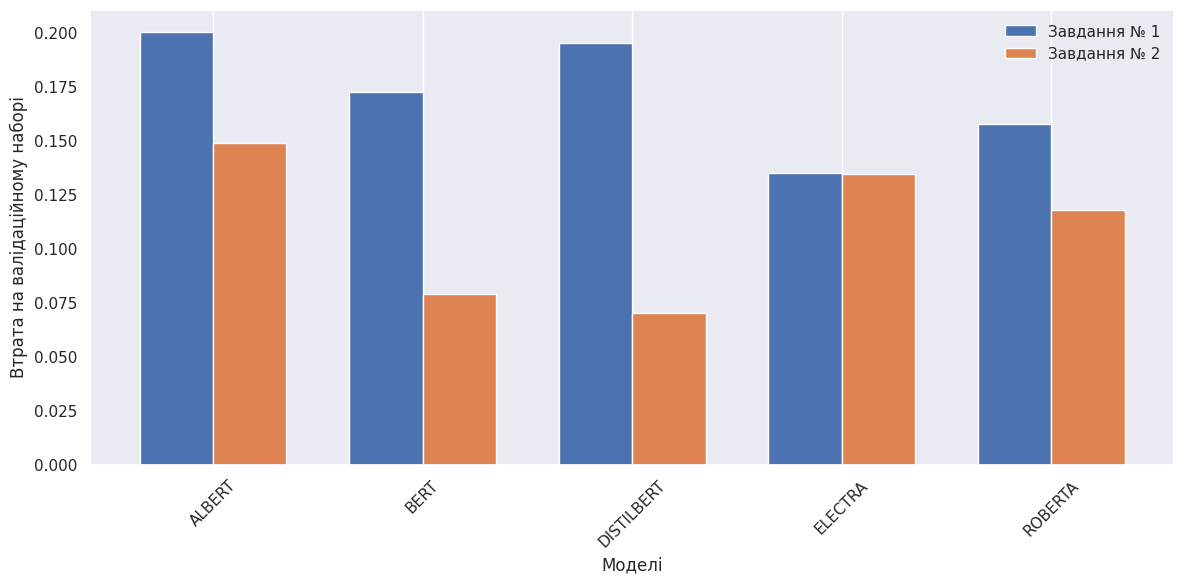

In [43]:
validation_loss_task1 = [0.20056, 0.17255, 0.1954675, 0.1352684, 0.15786]

validation_loss_task2 = [0.149102, 0.079044, 0.070399, 0.134666, 0.117843]

x = np.arange(len(models))

width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, validation_loss_task1, width, label='Завдання № 1')

bars2 = ax.bar(x + width/2, validation_loss_task2, width, label='Завдання № 2')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.set_xlabel('Моделі')
ax.set_ylabel('Втрата на валідаційному наборі')

ax.grid(axis='y')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()